In [9]:
import pandas as pd 
import matplotlib.pyplot as plt


In [10]:
lotto = pd.read_csv("./output/merged_lotto.csv")

lotto_plus = pd.read_csv("./output/merged_lottoplus.csv")

mini_lotto = pd.read_csv("./output/mini_lotto.csv")


In [11]:
print(lotto.head())

   number        date            numbers  szostka_count  szostka_value  \
0      47  22-12-1957   8,15,24,27,37,46              0            0.0   
1      46  15-12-1957   7,12,19,36,42,49              0            0.0   
2      45  08-12-1957  11,17,24,35,42,47              0            0.0   
3      44  01-12-1957    5,8,14,26,32,44              0            0.0   
4      43  24-11-1957    2,6,18,20,40,49              0            0.0   

   piatka_count  piatka_value  czworka_count  czworka_value  trojka_count  \
0             0           0.0              0            0.0             0   
1             0           0.0              0            0.0             0   
2             0           0.0              0            0.0             0   
3             0           0.0              0            0.0             0   
4             0           0.0              0            0.0             0   

   trojka_value  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4 

In [17]:
def count_winnings_by_year(dataset):
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    result = dataset.groupby('year').agg({
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()
    
    result["total"] = result["szostka_count"] + result["piatka_count"] + result["czworka_count"] + result["trojka_count"]
    return result


In [18]:
lotto_count_winnings_by_year = count_winnings_by_year(lotto)
mini_lotto_count_winnings_by_year = count_winnings_by_year(mini_lotto)
lotto_plus_count_winnings_by_year = count_winnings_by_year(lotto_plus)

In [21]:
def get_plot_total_wins_by_year(data) -> None:
    x = data["year"]
    y = data["total"]

    plt.plot(x, y)    
    plt.show()

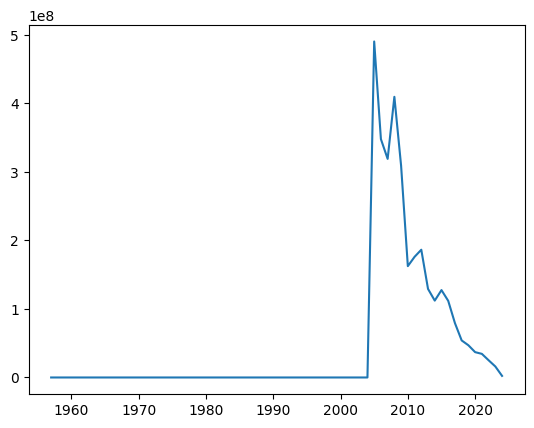

In [22]:
get_plot_total_wins_by_year(lotto_count_winnings_by_year)

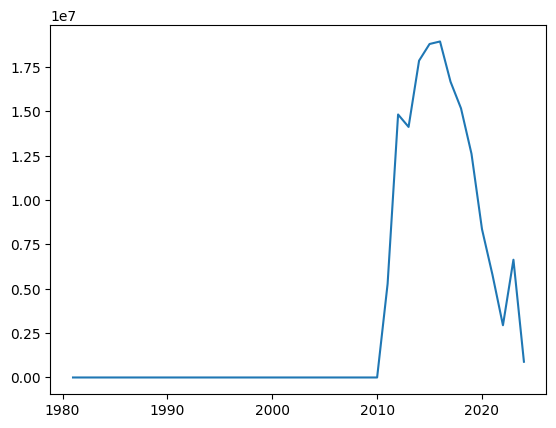

In [23]:
get_plot_total_wins_by_year(mini_lotto_count_winnings_by_year)

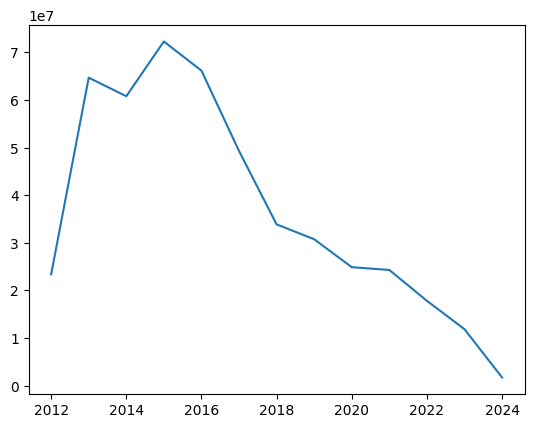

In [24]:
get_plot_total_wins_by_year(lotto_plus_count_winnings_by_year)

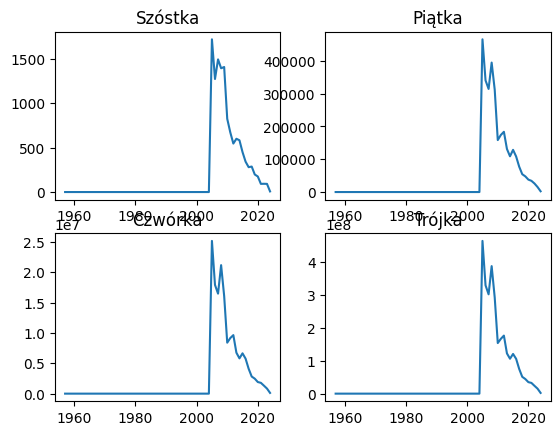

In [40]:
def get_plot_win_type_by_year(data) -> None:
    x = data["year"]
    
    szostka_count = data["szostka_count"]
    plt.subplot(2, 2, 1)
    plt.plot(x, szostka_count)
    plt.title("Szóstka")
    
    piatka_count = data["piatka_count"]
    plt.subplot(2, 2, 2)
    plt.plot(x, piatka_count)
    plt.title("Piątka")
    
    czworka_count = data["czworka_count"]
    plt.subplot(2, 2, 3)
    plt.plot(x, czworka_count)
    plt.title("Czwórka")
    
    trojka_count = data["trojka_count"]
    plt.subplot(2, 2, 4)
    plt.plot(x, trojka_count)
    plt.title("Trójka")
    
    plt.show()

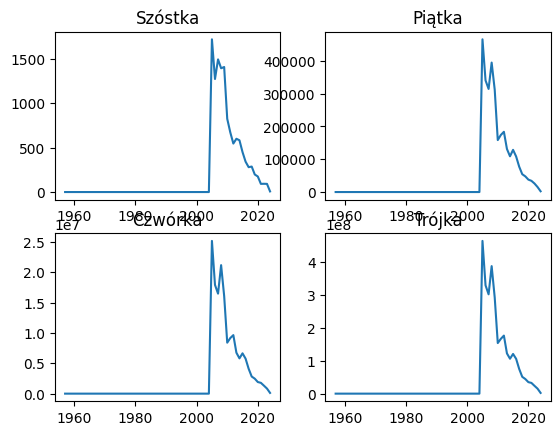

In [42]:
get_plot_win_type_by_year(lotto_count_winnings_by_year)

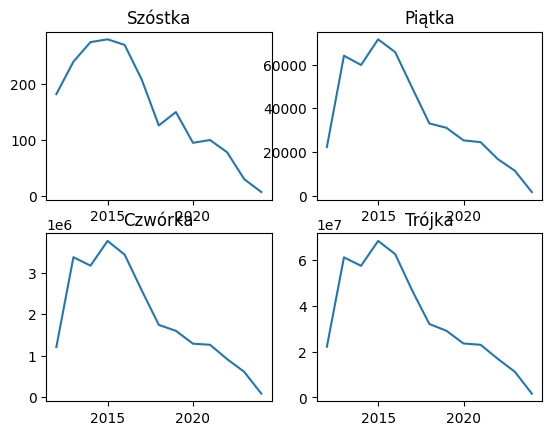

In [43]:
get_plot_win_type_by_year(lotto_plus_count_winnings_by_year)

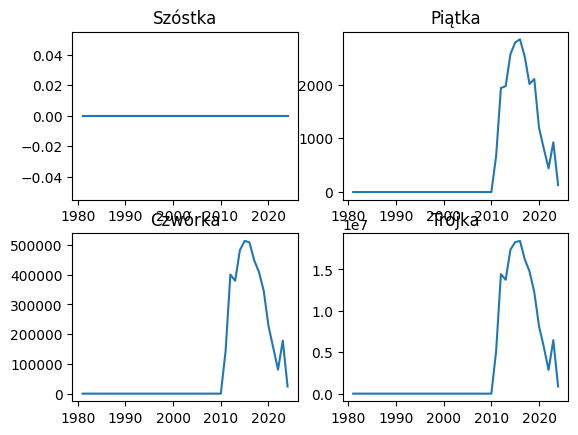

In [44]:
get_plot_win_type_by_year(mini_lotto_count_winnings_by_year)

In [53]:
def get_average_win_value_by_year(dataset) -> None:
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    dataset['szostka_total'] = dataset['szostka_count'] * dataset['szostka_value']
    dataset['piatka_total'] = dataset['piatka_count'] * dataset['piatka_value']
    dataset['czworka_total'] = dataset['czworka_count'] * dataset['czworka_value']
    dataset['trojka_total'] = dataset['trojka_count'] * dataset['trojka_value']
    
    result = dataset.groupby('year').agg({
        'szostka_total': 'sum',
        'piatka_total': 'sum',
        'czworka_total': 'sum',
        'trojka_total': 'sum',
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()

    result['szostka_avg'] = result['szostka_total'] / result['szostka_count']
    result['piatka_avg'] = result['piatka_total'] / result['piatka_count']
    result['czworka_avg'] = result['czworka_total'] / result['czworka_count']
    result['trojka_avg'] = result['trojka_total'] / result['trojka_count']
    
    return result

In [54]:
get_average_win_value_by_year(lotto)

,year,szostka_total,piatka_total,czworka_total,trojka_total,szostka_count,piatka_count,czworka_count,trojka_count,szostka_avg,piatka_avg,czworka_avg,trojka_avg
0,1957,0.000000e+00,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
1,1958,0.000000e+00,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
2,1959,0.000000e+00,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
3,1960,0.000000e+00,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
4,1961,0.000000e+00,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020,1.107370e+09,194471978.5,327713303.5,839600880.0,175,37875,1911265,34983370,6.327831e+06,5134.573690,171.464085,24.0
64,2021,1.009845e+09,181923053.2,309267117.2,782886624.0,92,34196,1781608,32620276,1.097658e+07,5320.009744,173.588756,24.0
65,2022,7.317586e+08,130674092.7,215118453.0,570688992.0,93,26019,1315980,23778708,7.868372e+06,5022.256532,163.466354,24.0
66,2023,4.727494e+08,84728916.6,143674725.6,364903104.0,92,15326,834140,15204296,5.138581e+06,5528.442947,172.242940,24.0


In [55]:
get_average_win_value_by_year(lotto_plus)

,year,szostka_total,piatka_total,czworka_total,trojka_total,szostka_count,piatka_count,czworka_count,trojka_count,szostka_avg,piatka_avg,czworka_avg,trojka_avg
0,2012,182000000.0,77987000.0,120844100.0,221627770.0,182,22282,1208441,22162777,1000000.0,3500.0,100.0,10.0
1,2013,240000000.0,224238000.0,337298400.0,612310920.0,240,64068,3372984,61231092,1000000.0,3500.0,100.0,10.0
2,2014,275000000.0,209363000.0,316949600.0,575432000.0,275,59818,3169496,57543200,1000000.0,3500.0,100.0,10.0
3,2015,280000000.0,250495000.0,376491000.0,684340100.0,280,71570,3764910,68434010,1000000.0,3500.0,100.0,10.0
4,2016,270000000.0,229950000.0,343413900.0,626414490.0,270,65700,3434139,62641449,1000000.0,3500.0,100.0,10.0
5,2017,208000000.0,172452000.0,257362400.0,466579680.0,208,49272,2573624,46657968,1000000.0,3500.0,100.0,10.0
6,2018,126000000.0,115762500.0,174330100.0,320863130.0,126,33075,1743301,32086313,1000000.0,3500.0,100.0,10.0
7,2019,150000000.0,108738000.0,160015800.0,291125820.0,150,31068,1600158,29112582,1000000.0,3500.0,100.0,10.0
8,2020,95000000.0,88620000.0,129077000.0,235568450.0,95,25320,1290770,23556845,1000000.0,3500.0,100.0,10.0
9,2021,100000000.0,85792000.0,126486000.0,229998880.0,100,24512,1264860,22999888,1000000.0,3500.0,100.0,10.0


In [56]:
get_average_win_value_by_year(mini_lotto)

,year,szostka_total,piatka_total,czworka_total,trojka_total,szostka_count,piatka_count,czworka_count,trojka_count,szostka_avg,piatka_avg,czworka_avg,trojka_avg
0,1981,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
1,1982,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
2,1983,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
3,1984,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
4,1985,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
5,1986,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
6,1987,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
7,1988,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
8,1989,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
9,1990,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN
